In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv(r"C:\Users\Samyak\Downloads\1000_Companies.csv")

In [26]:
dataset.shape

(1000, 5)

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [5]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
X = dataset.drop(columns='Profit')
y = dataset['Profit']

In [7]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [9]:
A = dataset.iloc[:,:-1].values
b = dataset.iloc[:,4].values

In [32]:
A

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [11]:
b

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

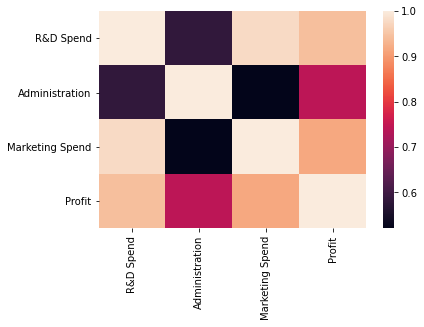

In [12]:
#data visualization
sb.heatmap(dataset.corr())

In [13]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
labelencoder = LabelEncoder()
A[:,3] = labelencoder.fit_transform(A[:,3])

In [15]:
A

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

In [16]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')
A=np.array(columnTransformer.fit_transform(A))

In [17]:
A

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [18]:
A = A[:,1:]

In [19]:
A

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [20]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test = train_test_split(A,b, test_size = 0.2)

In [21]:
from sklearn.linear_model import LinearRegression
model_train = LinearRegression()
model_train.fit(A_train, b_train)

LinearRegression()

In [33]:
b_pred = model_train.predict(A_test)
b_pred

array([142322.97967566,  86592.55357589, 142050.03192459,  87645.22389638,
       111893.77619969,  92830.16563241,  96883.50781741, 140760.74808302,
       127563.97143537, 140056.66985027, 176773.33369035, 146448.10440193,
        86145.37473309, 158579.32047886, 154739.79338511, 137455.96452997,
       114563.88025887, 103351.65691633,  50006.76953647, 140774.59645818,
        57894.97919709, 184118.71061346, 170391.82263262, 107064.79093596,
        91571.96973879,  92329.99593357, 141929.99808624, 137044.88202898,
       120706.47006698,  50317.47963717, 143933.29832114, 166666.48890226,
       178098.19601794, 121089.02384286, 168111.03924683, 143959.34628636,
        70096.28439829, 149702.86499485,  76415.58818383, 141533.48609598,
       186027.30283246, 106896.57111845, 180438.84479859,  53782.02045609,
       134699.48791366,  86917.42221372, 160501.58816233, 167082.72122522,
        62198.20233456, 138616.40602729, 180128.40778893, 124036.19900315,
        84561.65114472, 1

In [34]:
from sklearn.metrics import r2_score
r2_score(b_pred,b_test)

0.9670804134452737

In [42]:
arr = np.array([1.0, 0.0, 81668, 122963, 226205])
b1_pred = model_train.predict(arr.reshape(1, -1))
b1_pred

array([119603.56133314])